## SVM Soft-Margin Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt #only used for plotting!!!
%matplotlib inline

from sklearn.datasets import make_blobs #only imported .dataset to generate the dataset, package is not used for anything else!!!

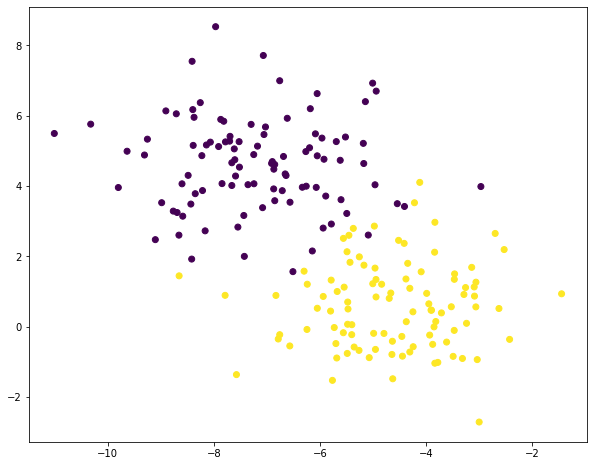

In [3]:
## generate data points
N = 200  # number of samples
D = 2  # number of dimensions
C = 2  # number of classes
seed = 12  # for reproducible experiments
cluster_std = 1.3
punish_const = 0.1

alpha_tol = 1e-4 # threshold for choosing support vectors

X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed, cluster_std = cluster_std)
y[y == 0] = -1  # it is more convenient to have {-1, 1} as class labels (instead of {0, 1})
y = y.astype(np.float)
plt.figure(figsize=[10, 8])
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In [4]:
from svms import soft_SVM
if __name__ == "__main__":
    def generate_data(N, D, C, seed):
        X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed, cluster_std=cluster_std)
        y[y == 0] = -1  
        return X, y.astype(np.float)

    def plot_svm(X, y, alpha, w, b):
        plt.figure(figsize=[10, 8])
        # Plot the hyperplane
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        x = np.linspace(X[:, 0].min(), X[:, 0].max())
        plt.plot(x, x * slope + intercept, 'k-', label='decision boundary')
        plt.plot(x, x * slope + intercept - 1/w[1], 'k--')
        plt.plot(x, x * slope + intercept + 1/w[1], 'k--')
        # Plot all the datapoints
        plt.scatter(X[:, 0], X[:, 1], c=y)
        # Mark the support vectors
        support_vecs = alpha > alpha_tol
        plt.scatter(X[support_vecs, 0], X[support_vecs, 1], c=y[support_vecs], s=250, marker='*', label='support vectors')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.legend(loc='upper left')

    def run_soft_svm():
        sampels, labels = generate_data(N, D, C, seed)

        clf = soft_SVM()
        alphas, w, b, = clf.fit(sampels, labels, alpha_tol)

        plot_svm(sampels, labels, alphas, w, b)

weights are [ 0.71735791 -1.50049428]
bias is 7.988519545404331


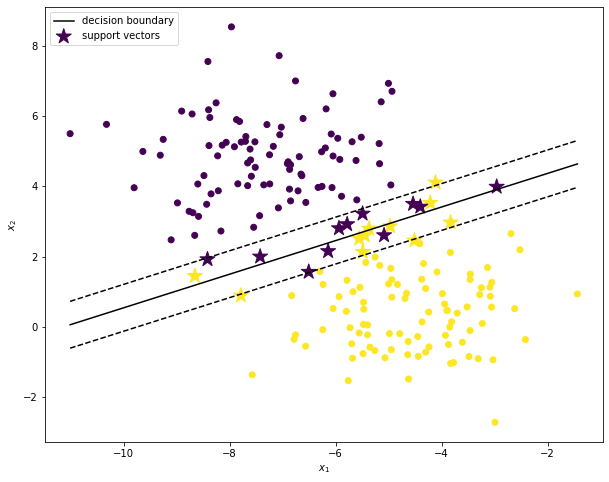

In [5]:
run_soft_svm()